<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/CompareImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install missingpy
!pip install scikit-learn==1.1.2

In [2]:
import sklearn
print(sklearn.__version__)

1.1.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**OriginalData**

In [4]:
import pandas as pd
widetable = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
widetable = widetable.iloc[:, 1:]
widetable.head()

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen
0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,30,...,NaN,NaN,7.2,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,0,...,480.0,NaN,NaN,202.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,0,...,442.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,0,...,NaN,133.0,6.9,201.0,177.0,147.0,30.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,0,...,253.0,97.0,NaN,NaN,NaN,NaN,NaN,17.0,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


In [5]:
df = widetable.copy()

**dummy**

In [6]:
widetable['Sex'] = widetable['Sex'].replace({'ชาย': 0, 'หญิง': 1})

In [7]:
nationality_map = {'ไทย': 0}

caucasian = ['บริติช  (อังกฤษ, สก็อตแลนด์)', 'อเมริกัน', 'เยอรมัน', 'โอมาน', 'ออสเตรเลีย', 'แคนาดา',
             'อิตาลี', 'สวิส', 'ซีเรีย', 'เดนมาร์ก', 'นอร์เวย์', 'ดัตช์', 'สเปน', 'เบลเยียม', 'ไอซ์แลนด์',
             'ฝรั่งเศส', 'เซนต์คิตส์และเนวิส', 'สวีเดน', 'ออสเตรีย', 'ไซปรัส']
asian = ['ลาว','จีน','เวียดนาม','เขมรอพยพ','ไทยลื้อ','ญี่ปุ่น', 'จีน(ไต้หวัน)']
other = ['ไม่ระบุ','อื่นๆ','ไร้สัญชาติ']

for nationality in asian:
    nationality_map[nationality] = 1

for nationality in caucasian:
    nationality_map[nationality] = 2

for nationality in other:
    nationality_map[nationality] = 3

widetable['NATNL'] = widetable['NATNL'].replace(nationality_map)

In [8]:
import numpy as np

In [9]:
widetable['LabLocation'] = np.where(widetable['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)

In [10]:
df_no_missing = widetable.dropna()
df_no_missing.head()

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen
131,2291888,15.35,3.4,2561-01-03 10:23:12.210,3434247,-2.561404,0,18,0,0,...,238.0,110.0,7.2,258.0,113.0,209.0,40.0,747.0,1,2559-09-02 07:34:38.390
364,1944785,2.07,33.8,2561-05-10 09:51:52.050,3671352,-25.247409,0,0,0,0,...,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0,2559-11-22 12:38:47.920
1270,811906,1.72,36.2,2562-03-25 10:01:27.753,4416087,-15.404570,0,0,0,0,...,289.0,75.0,5.8,168.0,106.0,114.0,34.0,258.0,1,2560-08-21 10:53:29.757
1562,1261164,1.71,28.9,2562-05-30 15:10:43.277,3579795,-4.255777,0,0,0,0,...,169.0,289.0,7.0,128.0,104.0,59.0,44.0,57.8,0,2559-10-21 08:31:00.233
1940,890452,1.48,43.4,2562-08-23 09:42:24.053,3411444,-9.459862,0,70,0,1,...,196.0,88.0,6.6,128.0,94.0,60.0,52.0,132.4,1,2559-10-14 18:59:15.893


In [11]:
remove = ['Slopes', 'PatientUID', 'PatientVisitUID','InPatient', 'OutPatient', 'Emergency','Recent_Date', 'VisitLocation', 'StartDTTM','EndDttm', 'LabCwhen']
no_missing = df_no_missing.drop(columns=remove)
no_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
131,15.35,3.4,0,18,0,0,0,0,0,0,...,8.50,238.0,110.0,7.2,258.0,113.0,209.0,40.0,747.0,1
364,2.07,33.8,0,0,0,0,0,0,0,20,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0
1270,1.72,36.2,0,0,0,0,0,0,0,63,...,8.05,289.0,75.0,5.8,168.0,106.0,114.0,34.0,258.0,1
1562,1.71,28.9,0,0,0,0,0,0,0,0,...,4.42,169.0,289.0,7.0,128.0,104.0,59.0,44.0,57.8,0
1940,1.48,43.4,0,70,0,1,0,0,0,0,...,6.20,196.0,88.0,6.6,128.0,94.0,60.0,52.0,132.4,1


In [12]:
columns_with_null  = no_missing.isnull().any()
if columns_with_null.any():
    print("There are columns with null values.")
else:
    print("No columns have null values.")

No columns have null values.


**สุ่มค่าว่างในข้อมูล**

In [13]:
import numpy as np
np.random.seed(42)
rows, cols = no_missing.shape
missing_fraction = 0.2
mask = np.random.rand(rows, cols) < missing_fraction
df_with_missing = no_missing.mask(mask)

df_with_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
131,15.35,3.4,0.0,18.0,NaN,NaN,NaN,0.0,0.0,0.0,...,8.50,238.0,110.0,7.2,NaN,113.0,NaN,40.0,747.0,NaN
364,NaN,33.8,0.0,0.0,0.0,NaN,0.0,NaN,0.0,20.0,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
1270,1.72,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,63.0,...,NaN,289.0,NaN,NaN,168.0,106.0,114.0,34.0,258.0,1.0
1562,1.71,28.9,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,4.42,169.0,289.0,7.0,128.0,NaN,59.0,NaN,57.8,0.0
1940,1.48,43.4,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,...,6.20,196.0,88.0,NaN,NaN,94.0,NaN,52.0,132.4,1.0


In [14]:
df_with_missing.isnull().sum()

Recent_Creatinine            25
Recent_eGFR                  32
G1M2:ARB                     39
G3M1:Statin                  29
G5M2:NSAIDs                  28
                             ..
L22:Triglyceride             35
L23:LDL Cholesterol          34
L24:HDL Cholesterol          20
L28:UrineProtein/Cr ratio    27
LabLocation                  30
Length: 72, dtype: int64

**MICE**

In [15]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
imputer = IterativeImputer(random_state=0, initial_strategy='median')
data_mice = df_with_missing.copy()
data_mice_filled = imputer.fit_transform(data_mice)
Mice = pd.DataFrame(data_mice_filled, columns = data_mice.columns).round(1)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
Mice.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.4,3.4,0.0,18.0,0.3,4.0,13.7,0.0,0.0,0.0,...,8.5,238.0,110.0,7.2,205.1,113.0,150.0,40.0,747.0,0.5
1,3.0,33.8,0.0,0.0,0.0,0.5,0.0,4.3,0.0,20.0,...,8.4,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
2,1.7,41.6,0.0,0.0,0.2,0.0,0.0,0.0,-0.1,63.0,...,7.5,289.0,129.7,7.7,168.0,106.0,114.0,34.0,258.0,1.0
3,1.7,28.9,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,...,4.4,169.0,289.0,7.0,128.0,169.5,59.0,49.4,57.8,0.0
4,1.5,43.4,12.1,60.6,0.0,1.0,33.4,0.0,0.0,0.0,...,6.2,196.0,88.0,5.7,163.1,94.0,81.5,52.0,132.4,1.0


**MissForest**

In [18]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [19]:
imputer = MissForest()
data_missfr = df_with_missing.copy()
data_missfr_filled = imputer.fit_transform(data_missfr)
MissForest = pd.DataFrame(data_missfr_filled, columns = data_missfr.columns).round(1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 4


In [20]:
MissForest.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.4,3.4,0.0,18.0,0.0,11.1,8.0,0.0,0.0,0.0,...,8.5,238.0,110.0,7.2,148.8,113.0,89.8,40.0,747.0,0.6
1,1.9,33.8,0.0,0.0,0.0,0.0,0.0,16.6,0.0,20.0,...,8.4,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
2,1.7,34.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,63.0,...,8.3,289.0,143.0,7.7,168.0,106.0,114.0,34.0,258.0,1.0
3,1.7,28.9,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,...,4.4,169.0,289.0,7.0,128.0,131.4,59.0,38.8,57.8,0.0
4,1.5,43.4,1.5,26.4,0.0,1.0,41.6,0.0,0.0,0.0,...,6.2,196.0,88.0,6.1,154.9,94.0,96.3,52.0,132.4,1.0


**SimpleImpute**


```
* Mode = If the data type is 'object'.
* Mean = If the data type is numeric (not 'object') and dont have outlier
* Median = If the data type is numeric (not 'object') and have outlier
```



In [21]:
df_no_missing = df.dropna() #148 rows

In [22]:
columns_to_remove = ['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM', 'EndDttm', 'LabCwhen']
df_no_missing.drop(columns=columns_to_remove, inplace=True)

<ipython-input-22-364fa9913522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing.drop(columns=columns_to_remove, inplace=True)


In [23]:
import numpy as np
np.random.seed(42)
rows, cols = df_no_missing.shape
missing_fraction = 0.2
mask = np.random.rand(rows, cols) < missing_fraction
missing_for_binary = df_no_missing.mask(mask)

In [24]:
columns_to_keep = ['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM', 'EndDttm', 'LabCwhen']
df_subset = df.loc[missing_for_binary.index]
missing_for_binary = pd.concat([df_subset[columns_to_keep], missing_for_binary], axis=1)
missing_for_binary.shape

(148, 83)

In [25]:
df_subset.shape

(148, 83)

In [26]:
columns_with_null = missing_for_binary.columns[missing_for_binary.isnull().any()].tolist()
missing_for_binary[columns_with_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 131 to 51563
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Recent_Creatinine             123 non-null    float64
 1   Recent_eGFR                   116 non-null    float64
 2   G1M2:ARB                      109 non-null    float64
 3   G3M1:Statin                   119 non-null    float64
 4   G5M2:NSAIDs                   120 non-null    float64
 5   G1M5:Diuretic                 119 non-null    float64
 6   G1M7:Beta blocker             123 non-null    float64
 7   G1M3:Dihydropyridine CCB      114 non-null    float64
 8   G1M6:MRA                      114 non-null    float64
 9   G1M1:ACEI                     113 non-null    float64
 10  G2M2:Metformin                119 non-null    float64
 11  G2M3:DPP4 inhibitor           115 non-null    float64
 12  G2M1:SU                       121 non-null    float64
 13  G

In [27]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to detect outliers
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return not outliers.empty

columns_with_null = missing_for_binary.columns[missing_for_binary.isnull().any()].tolist()

# Create a new DataFrame with missing values
imputed_table = missing_for_binary.copy()

# Fill null values with column mode for object columns using apply and lambda function
for column in columns_with_null:
    if column in imputed_table.select_dtypes(include=['object']).columns:
        imputed_table[column].fillna(imputed_table[column].mode()[0], inplace=True)

# Impute missing values using the non-missing data
for column in columns_with_null:
    if column in imputed_table.select_dtypes(include=['float64']).columns:
        if detect_outliers(df_subset, column):
            # Median imputation for numeric columns with outliers
            median_values = df_subset.groupby('PatientVisitUID')[column].median()
            imputed_table[column].fillna(imputed_table['PatientVisitUID'].map(median_values), inplace=True)
        else:
            # Mean imputation for numeric columns without outliers
            mean_values = df_subset.groupby('PatientVisitUID')[column].mean()
            imputed_table[column].fillna(imputed_table['PatientVisitUID'].map(mean_values), inplace=True)


In [28]:
columns_to_remove = ['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM', 'EndDttm', 'LabCwhen']
imputed_table.drop(columns=columns_to_remove, inplace=True)
missing_for_binary.drop(columns=columns_to_remove, inplace=True)

**dummy**

In [29]:
missing_for_binary['Sex'] = missing_for_binary['Sex'].replace({'ชาย': 0, 'หญิง': 1})
imputed_table['Sex'] = imputed_table['Sex'].replace({'ชาย': 0, 'หญิง': 1})

In [30]:
nationality_map = {'ไทย': 0}

caucasian = ['บริติช  (อังกฤษ, สก็อตแลนด์)', 'อเมริกัน', 'เยอรมัน', 'โอมาน', 'ออสเตรเลีย', 'แคนาดา',
             'อิตาลี', 'สวิส', 'ซีเรีย', 'เดนมาร์ก', 'นอร์เวย์', 'ดัตช์', 'สเปน', 'เบลเยียม', 'ไอซ์แลนด์',
             'ฝรั่งเศส', 'เซนต์คิตส์และเนวิส', 'สวีเดน', 'ออสเตรีย', 'ไซปรัส']
asian = ['ลาว','จีน','เวียดนาม','เขมรอพยพ','ไทยลื้อ','ญี่ปุ่น', 'จีน(ไต้หวัน)']
other = ['ไม่ระบุ','อื่นๆ','ไร้สัญชาติ']

for nationality in asian:
    nationality_map[nationality] = 1

for nationality in caucasian:
    nationality_map[nationality] = 2

for nationality in other:
    nationality_map[nationality] = 3

missing_for_binary['NATNL'] = missing_for_binary['NATNL'].replace(nationality_map)
imputed_table['NATNL'] = imputed_table['NATNL'].replace(nationality_map)

In [31]:
missing_for_binary['LabLocation'] = np.where(missing_for_binary['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)
imputed_table['LabLocation'] = np.where(imputed_table['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)

##**Compare**



In [32]:
# Reset indices of df_with_missing before comparing
df_with_missing.reset_index(drop=True, inplace=True)
no_missing.reset_index(drop=True, inplace=True)
missing_for_binary.reset_index(drop=True, inplace=True)
imputed_table.reset_index(drop=True, inplace=True)

In [33]:
df_with_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.35,3.4,0.0,18.0,NaN,NaN,NaN,0.0,0.0,0.0,...,8.50,238.0,110.0,7.2,NaN,113.0,NaN,40.0,747.0,NaN
1,NaN,33.8,0.0,0.0,0.0,NaN,0.0,NaN,0.0,20.0,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
2,1.72,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,63.0,...,NaN,289.0,NaN,NaN,168.0,106.0,114.0,34.0,258.0,1.0
3,1.71,28.9,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,4.42,169.0,289.0,7.0,128.0,NaN,59.0,NaN,57.8,0.0
4,1.48,43.4,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,...,6.20,196.0,88.0,NaN,NaN,94.0,NaN,52.0,132.4,1.0


In [34]:
missing_for_binary.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.35,3.4,0.0,18.0,NaN,NaN,NaN,0.0,0.0,0.0,...,8.50,238.0,110.0,7.2,NaN,113.0,NaN,40.0,747.0,0
1,NaN,33.8,0.0,0.0,0.0,NaN,0.0,NaN,0.0,20.0,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0
2,1.72,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,63.0,...,NaN,289.0,NaN,NaN,168.0,106.0,114.0,34.0,258.0,1
3,1.71,28.9,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,4.42,169.0,289.0,7.0,128.0,NaN,59.0,NaN,57.8,0
4,1.48,43.4,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,...,6.20,196.0,88.0,NaN,NaN,94.0,NaN,52.0,132.4,1


In [35]:
no_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.35,3.4,0,18,0,0,0,0,0,0,...,8.50,238.0,110.0,7.2,258.0,113.0,209.0,40.0,747.0,1
1,2.07,33.8,0,0,0,0,0,0,0,20,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0
2,1.72,36.2,0,0,0,0,0,0,0,63,...,8.05,289.0,75.0,5.8,168.0,106.0,114.0,34.0,258.0,1
3,1.71,28.9,0,0,0,0,0,0,0,0,...,4.42,169.0,289.0,7.0,128.0,104.0,59.0,44.0,57.8,0
4,1.48,43.4,0,70,0,1,0,0,0,0,...,6.20,196.0,88.0,6.6,128.0,94.0,60.0,52.0,132.4,1


In [36]:
import numpy as np
missF = np.sum(np.abs(MissForest[df_with_missing.isnull().any(axis=1)] - no_missing[df_with_missing.isnull().any(axis=1)]))
mice =  np.sum(np.abs(Mice[df_with_missing.isnull().any(axis=1)] - no_missing[df_with_missing.isnull().any(axis=1)]))
simple = np.sum(np.abs(imputed_table[missing_for_binary.isnull().any(axis=1)] - no_missing[missing_for_binary.isnull().any(axis=1)]))
for i in [missF, mice, simple]:
    print(np.sum(i))

17819.3
22608.64
28.0


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

imputed_data = {'OriginalData': no_missing}
imputed_data['Mice'] = Mice
imputed_data['MissForest'] = MissForest
imputed_data['SimpleImpute'] = imputed_table

         Method       MAPE       MAE         MSE
0  OriginalData   0.000000  0.000000    0.000000
1          Mice  11.216695  2.121682  208.715717
2    MissForest   7.985634  1.672232  104.960350
3  SimpleImpute   0.552923  0.002628    0.002628


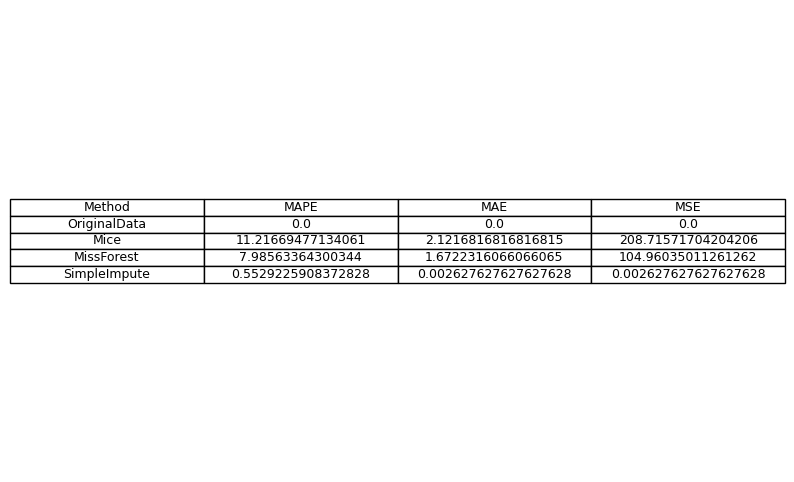

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_results = {}
for method in imputed_data.keys():
    mse_results[method] = mean_squared_error(no_missing, imputed_data[method])

mape_results = {}
for method in imputed_data.keys():
    true_values = no_missing.values.flatten()
    imputed_values = imputed_data[method].values.flatten()

    # Exclude zero values to avoid division by zero
    non_zero_mask = true_values != 0
    true_values_non_zero = true_values[non_zero_mask]
    imputed_values_non_zero = imputed_values[non_zero_mask]

    mape_results[method] = np.mean(np.abs((true_values_non_zero - imputed_values_non_zero) / true_values_non_zero)) * 100

# Calculate MAE for each imputation method
mae_results = {}
for method in imputed_data.keys():
    mae_results[method] = mean_absolute_error(no_missing, imputed_data[method])

# Convert MAPE, MAE, and MSE results to a DataFrame for easier plotting
evaluation_df = pd.DataFrame({
    'Method': list(imputed_data.keys()),
    'MAPE': list(mape_results.values()),
    'MAE': list(mae_results.values()),
    'MSE': list(mse_results.values())
})

# Print evaluation metrics
print(evaluation_df)

# Visualize metrics as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=evaluation_df.values, colLabels=evaluation_df.columns, cellLoc = 'center', loc='center')

plt.show()


In [39]:
pip install prettytable

+--------------+--------------------+----------------------+----------------------+
|    Method    |        MAPE        |         MAE          |         MSE          |
+--------------+--------------------+----------------------+----------------------+
| OriginalData |        0.0         |         0.0          |         0.0          |
|     Mice     | 11.21669477134061  |  2.1216816816816815  |  208.71571704204206  |
|  MissForest  |  7.98563364300344  |  1.6722316066066065  |  104.96035011261262  |
| SimpleImpute | 0.5529225908372828 | 0.002627627627627628 | 0.002627627627627628 |
+--------------+--------------------+----------------------+----------------------+


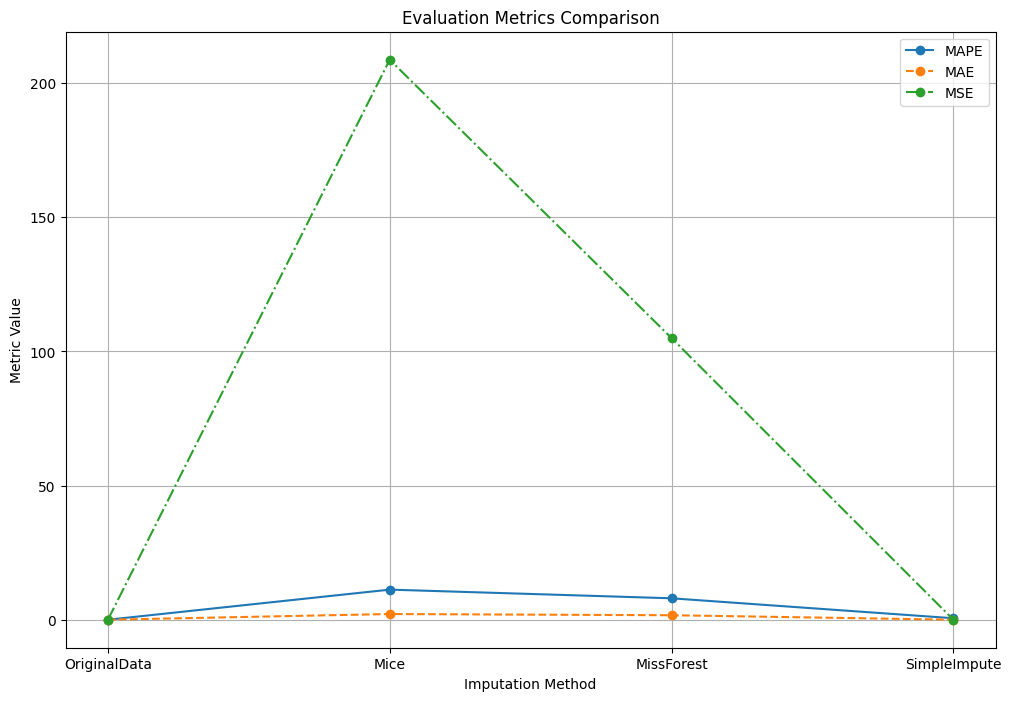

In [40]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

# Print the pretty table
table = PrettyTable()
table.field_names = evaluation_df.columns.tolist()
for row in evaluation_df.itertuples(index=False):
    table.add_row(row)

print(table)

# Visualize metrics as a line plot
fig, ax = plt.subplots(figsize=(12, 8))

# Line styles for each metric
line_styles = {'MAPE': '-', 'MAE': '--', 'MSE': '-.'}

for metric, style in line_styles.items():
    ax.plot(evaluation_df['Method'], evaluation_df[metric], label=metric, marker='o', linestyle=style)

plt.title('Evaluation Metrics Comparison')
plt.xlabel('Imputation Method')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
pip install tabulate

In [42]:
from tabulate import tabulate

# Print the table with specific formatting
print(tabulate(evaluation_df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".6f"))


╒══════════════╤═══════════╤══════════╤════════════╕
│ Method       │      MAPE │      MAE │        MSE │
╞══════════════╪═══════════╪══════════╪════════════╡
│ OriginalData │  0.000000 │ 0.000000 │   0.000000 │
├──────────────┼───────────┼──────────┼────────────┤
│ Mice         │ 11.216695 │ 2.121682 │ 208.715717 │
├──────────────┼───────────┼──────────┼────────────┤
│ MissForest   │  7.985634 │ 1.672232 │ 104.960350 │
├──────────────┼───────────┼──────────┼────────────┤
│ SimpleImpute │  0.552923 │ 0.002628 │   0.002628 │
╘══════════════╧═══════════╧══════════╧════════════╛


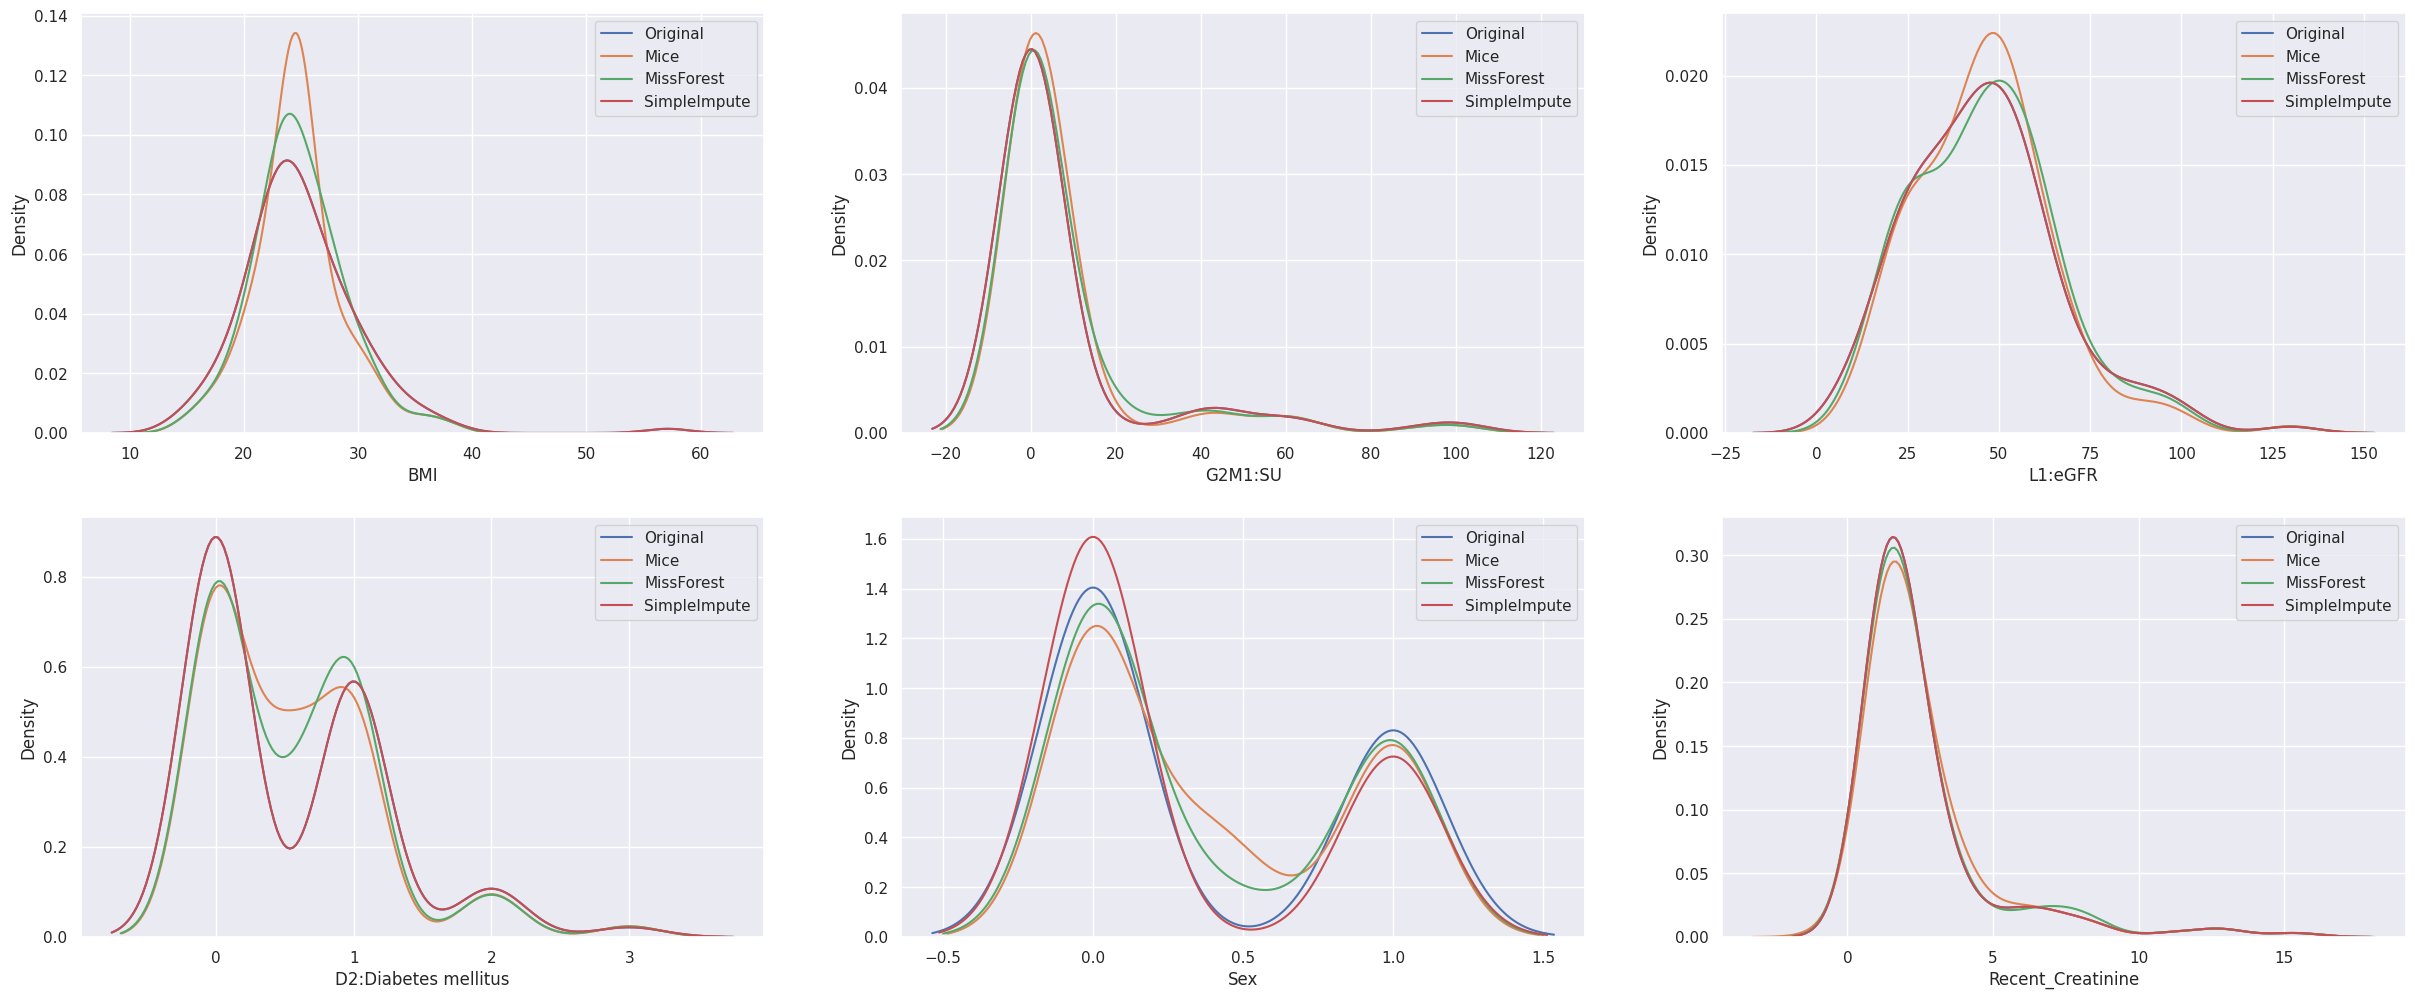

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['BMI', 'G2M1:SU', 'L1:eGFR', 'D2:Diabetes mellitus', 'Sex', 'Recent_Creatinine']

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(30, 12), nrows=2, ncols=3)

for col, i, j in zip(selected_columns, [0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]):
    sns.kdeplot(x=no_missing[col][df_with_missing.isnull().any(axis=1)], label='Original', ax=ax[i][j])
    sns.kdeplot(x=Mice[col][df_with_missing.isnull().any(axis=1)], label='Mice', ax=ax[i][j])
    sns.kdeplot(x=MissForest[col][df_with_missing.isnull().any(axis=1)], label='MissForest', ax=ax[i][j])
    sns.kdeplot(x=imputed_table[col][df_with_missing.isnull().any(axis=1)], label='SimpleImpute', ax=ax[i][j])

    ax[i][j].legend()

plt.show()
